In [141]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import re
#from PIL import Image
from keras.preprocessing import image

In [142]:
IMAGE_WIDTH = 224    
IMAGE_HEIGHT = 224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3


# Path where our data is located
base_path = "./Data/garbage_classification/"

# Dictionary to save our 12 classes
categories = {0: 'paper', 1: 'cardboard', 2: 'plastic', 3: 'metal', 4: 'trash', 5: 'battery',
              6: 'shoes', 7: 'clothes', 8: 'green-glass', 9: 'brown-glass', 10: 'white-glass',
              11: 'biological'}

print('defining constants successful!')

defining constants successful!


In [143]:
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list  +filenames
    categories_list = categories_list + [category] * len(filenames)
    
df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df = add_class_name_prefix(df, 'filename')
df = df.sample(frac=1).reset_index(drop=True)
df = df[:15500]

print('number of elements = ' , len(df))

number of elements =  15500


In [144]:
train = tf.keras.utils.image_dataset_from_directory(
    base_path,
    class_names=['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass'],
    batch_size=50,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    validation_split=0.2,
    subset="training",
    seed=123
)

Found 15515 files belonging to 12 classes.
Using 12412 files for training.


In [145]:
test=tf.keras.utils.image_dataset_from_directory(
    base_path,
    class_names=['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass'],
    batch_size=50,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 15515 files belonging to 12 classes.
Using 3103 files for validation.


In [146]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

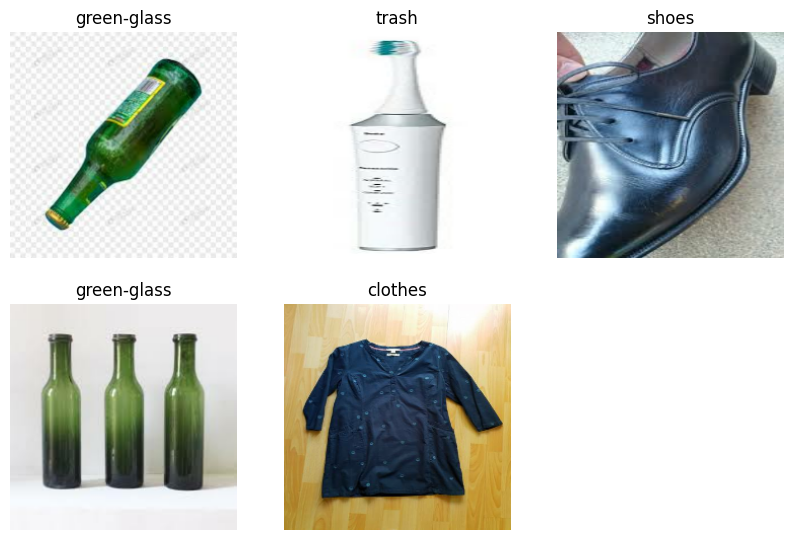

In [147]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [148]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 224, 224, 3)
(50,)


In [149]:
model = keras.Sequential([
    keras.layers.Normalization(),
    keras.layers.Convolution2D(kernel_size=4, filters=8, padding="same"),
    keras.layers.Convolution2D(kernel_size=4, filters=8, padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None),
    keras.layers.Convolution2D(kernel_size=4, filters=8, padding="same"),
    keras.layers.Convolution2D(kernel_size=4, filters=8, padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [150]:
model.compile(optimizer="adam", 
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
model.build(input_shape=(50,32,32,3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (50, 32, 32, 3)          7         
 ion)                                                            
                                                                 
 conv2d_8 (Conv2D)           (50, 32, 32, 8)           392       
                                                                 
 conv2d_9 (Conv2D)           (50, 32, 32, 8)           1032      
                                                                 
 max_pooling2d_4 (MaxPooling  (50, 16, 16, 8)          0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (50, 16, 16, 8)           1032      
                                                                 
 conv2d_11 (Conv2D)          (50, 13, 13, 8)          